## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, how="inner", on = ["Mouse ID"])

# Display the data table for preview


In [2]:
# quick look at files to determine if correct merge was used, look at data types etc
print(mouse_metadata.info())
print()
print(study_results.info())
print()
print(mouse_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Dat

In [3]:
# Checking the number of mice.
Number_mice = len(mouse_results["Mouse ID"].unique())
Number_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_micedata = mouse_results.loc[mouse_results.duplicated(["Mouse ID", "Timepoint"])]





In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_micedata)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = 'first')

In [7]:
# Checking the number of mice in the clean DataFrame.
print(clean_mouse_results.info())
print()
print(len(clean_mouse_results["Mouse ID"].unique()))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB
None

249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

(-1.0, 10.0)

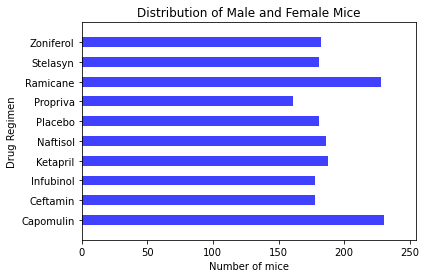

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# collate data
treatments = mouse_results.groupby(["Drug Regimen"])["Mouse ID"].count()

# plot titles
plot_title = ("Distribution of Male and Female Mice")

# create chart
treatment_chart = treatments.plot(kind = "barh", color = "blue", alpha = 0.75, title = plot_title)

# modify chart appearance
treatment_chart.set_xlabel("Number of mice")
treatment_chart.set_xlim(0, max(treatments)+25)
treatment_chart.set_ylim(-1,len(treatments))


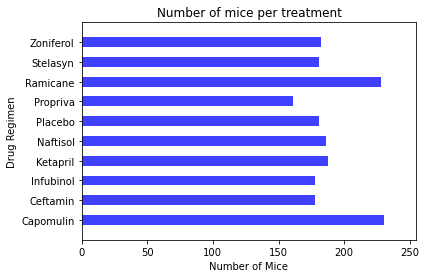

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.barh(treatments.index.tolist(), treatments, facecolor="blue", alpha=0.75, align="center", height = 0.5)

y_axis = np.arange(0, len(treatments))
tick_locations = []
for y in y_axis:
    tick_locations.append(y)
plt.yticks(tick_locations, treatments.index.tolist())

plt.title("Number of mice per treatment")
plt.xlabel("Number of Mice")
plt.ylabel("Drug Regimen")

plt.xlim(0, max(treatments)+25)
plt.ylim(-1,len(treatments) )


plt.show()


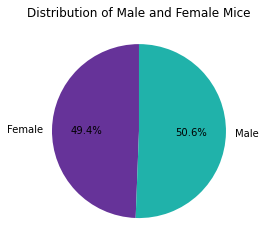

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# get data for plot
mf_dist = mouse_results.groupby(["Sex"])["Mouse ID"].count()

# choose colours for female / male
colors = ["rebeccapurple", "lightseagreen"]

# add title
plot_title = ("Distribution of Male and Female Mice")

# draw pie plot
mf_chart = mf_dist.plot(kind = "pie", startangle = 90, colors = colors, autopct="%1.1f%%", title = plot_title)

# remove unnecessary ylabel
mf_chart.set_ylabel('')

mf_chart


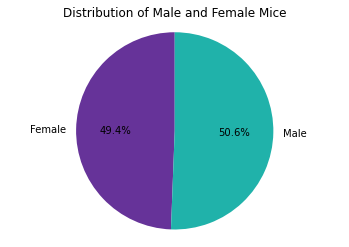

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["rebeccapurple", "lightseagreen"]
plt.pie(mf_dist, labels = mf_dist.index.tolist(), colors = colors, startangle = 90, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Male and Female Mice")
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# get data for mice treated with Capomulin
capo_results = mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin"]

print(capo_results["Mouse ID"].unique())

# Choose mouse b742
capo_results_b742 = capo_results.loc[capo_results["Mouse ID"] == 'b742']







['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


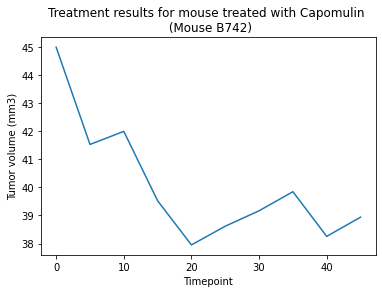

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
fig, ax = plt.subplots()
ax.plot(capo_results_b742["Timepoint"], capo_results_b742["Tumor Volume (mm3)"])

# add titles
ax.set_title("Treatment results for mouse treated with Capomulin \n (Mouse B742)")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor volume (mm3)")

plt.style.use("seaborn-colorblind")

plt.show()


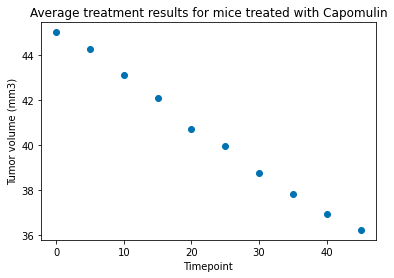

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# get data
capo_avg_vol = capo_results.groupby("Timepoint")["Tumor Volume (mm3)"].mean()

x_axis = capo_avg_vol.index.tolist()

# create chart
fig, ax = plt.subplots()

ax.scatter(x_axis, capo_avg_vol)
ax.set_title("Average treatment results for mice treated with Capomulin")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor volume (mm3)")

plt.style.use("seaborn-colorblind")


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
